# <p style="font-family: Arial; font-size:3.0em;color:purple; font-style:bold">Kidney Disease Evalutation
<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>Data Source: UCI >>>https://archive.ics.uci.edu/ml/datasets/chronic_kidney_disease</p>

## Some basic Informations about the given dataset
### Source:

Source:
Dr.P.Soundarapandian.M.D.,D.M
(Senior Consultant Nephrologist),
Apollo Hospitals,
Managiri,
Madurai Main Road,
Karaikudi,
Tamilnadu,
India.

Creator:
L.Jerlin Rubini(Research Scholar)
Alagappa University,
EmailId :jel.jerlin '@' gmail.com
ContactNo :+91-9597231281

Guided by:
Dr.P.Eswaran Assistant Professor,
Department of Computer Science and Engineering,
Alagappa University,
Karaikudi,
Tamilnadu,
India.
Emailid:eswaranperumal '@' gmail.com

### Attributes:
We use 24 + class = 25 ( 11 numeric ,14 nominal)
1.Age(numerical)
age in years
2.Blood Pressure(numerical)
bp in mm/Hg
3.Specific Gravity(nominal)
sg - (1.005,1.010,1.015,1.020,1.025)
4.Albumin(nominal)
al - (0,1,2,3,4,5)
5.Sugar(nominal)
su - (0,1,2,3,4,5)
6.Red Blood Cells(nominal)
rbc - (normal,abnormal)
7.Pus Cell (nominal)
pc - (normal,abnormal)
8.Pus Cell clumps(nominal)
pcc - (present,notpresent)
9.Bacteria(nominal)
ba - (present,notpresent)
10.Blood Glucose Random(numerical)
bgr in mgs/dl
11.Blood Urea(numerical)
bu in mgs/dl
12.Serum Creatinine(numerical)
sc in mgs/dl
13.Sodium(numerical)
sod in mEq/L
14.Potassium(numerical)
pot in mEq/L
15.Hemoglobin(numerical)
hemo in gms
16.Packed Cell Volume(numerical)
17.White Blood Cell Count(numerical)
wc in cells/cumm
18.Red Blood Cell Count(numerical)
rc in millions/cmm
19.Hypertension(nominal)
htn - (yes,no)
20.Diabetes Mellitus(nominal)
dm - (yes,no)
21.Coronary Artery Disease(nominal)
cad - (yes,no)
22.Appetite(nominal)
appet - (good,poor)
23.Pedal Edema(nominal)
pe - (yes,no)
24.Anemia(nominal)
ane - (yes,no)
25.Class (nominal)
class - (ckd,notckd)

<br>

<img src ='Dataset_info.jpg'>

### Importing the necessary libraries into the Kernel

In [34]:
#importing required libraries

#Classifiers
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

#RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier

#Pre Processing Tools
from sklearn.impute import SimpleImputer
from impyute.imputation.cs import fast_knn
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_selection import RFE

#Prediction tools
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Numpy and Pandas
import pandas as pd 
import pandas_profiling as pp
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

#Visualisation Tools
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
traindf = pd.read_csv('chronic_kidney.csv')

In [7]:
traindf.head()

,age,bp,spec_gravity,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [5]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
age             391 non-null float64
bp              388 non-null float64
spec_gravity    353 non-null float64
al              354 non-null float64
su              351 non-null float64
rbc             248 non-null object
pc              335 non-null object
pcc             396 non-null object
ba              396 non-null object
bgr             356 non-null float64
bu              381 non-null float64
sc              383 non-null float64
sod             313 non-null float64
pot             312 non-null float64
hemo            348 non-null float64
pcv             329 non-null float64
wbcc            294 non-null float64
rbcc            269 non-null float64
htn             398 non-null object
dm              398 non-null object
cad             398 non-null object
appet           399 non-null object
pe              399 non-null object
ane             399 non-null object
class           4

In [13]:
traindf.describe()

,age,bp,spec_gravity,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


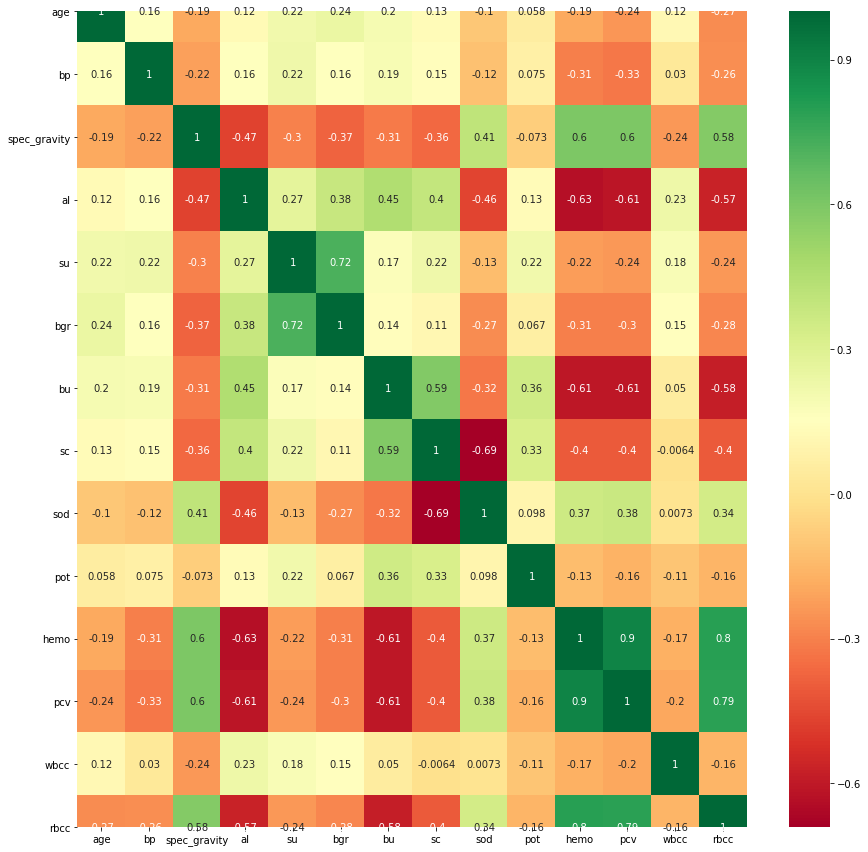

In [12]:
#using heatmap
corrmat = traindf.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(traindf[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [17]:
rep = pp.ProfileReport(traindf)
rep.to_file('Kidney_disease_data_report.html')

### Performing some feature engineering on the dataset

After initial evaluation it was seen that there were alot of missing values in the dataset.
<img src ='missing.png'>

## First we try to handle the missing values

#### To do this:
>> We will impute the values of the dataset inorder to habdles the missings.
<br>
>> We would also change the categorical values to numerical ones for ease of training 

In [25]:
#Performing Label Encoding
enc = LabelEncoder()
for i in traindf.columns:
    if np.dtype(traindf[str(i)]) == 'object':
        traindf2[str(i)] = enc.fit_transform(traindf[str(i)].astype(str))
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
age             391 non-null float64
bp              388 non-null float64
spec_gravity    353 non-null float64
al              354 non-null float64
su              351 non-null float64
rbc             400 non-null int32
pc              400 non-null int32
pcc             400 non-null int32
ba              400 non-null int32
bgr             356 non-null float64
bu              381 non-null float64
sc              383 non-null float64
sod             313 non-null float64
pot             312 non-null float64
hemo            348 non-null float64
pcv             329 non-null float64
wbcc            294 non-null float64
rbcc            269 non-null float64
htn             400 non-null int32
dm              400 non-null int32
cad             400 non-null int32
appet           400 non-null int32
pe              400 non-null int32
ane             400 non-null int32
class           400 non-nul

### Now we have two options/ approach to perform our imputation
>> * Simple Imputation
>> * Imputation by Fast KNN
<br>


*** Here we choose the fast knn approach as it has been proven to be much more efficient in earlier uses.***

In [28]:
traindf2 = fast_knn(traindf, k=3)
traindf2.columns = traindf.columns
traindf2

,age,bp,spec_gravity,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.000000,1.020000,1.000000,0.000000,1.0,2.0,1.0,1.0,121.000000,...,44.000000,7800.000000,5.200000,2.0,3.0,1.0,0.0,1.0,1.0,0.0
1,7.0,50.000000,1.020000,4.000000,0.000000,1.0,2.0,1.0,1.0,118.794497,...,38.000000,6000.000000,5.231679,1.0,2.0,1.0,0.0,1.0,1.0,0.0
2,62.0,80.000000,1.010000,2.000000,3.000000,2.0,2.0,1.0,1.0,423.000000,...,31.000000,7500.000000,3.502839,1.0,3.0,1.0,2.0,1.0,2.0,0.0
3,48.0,70.000000,1.005000,4.000000,0.000000,2.0,0.0,2.0,1.0,117.000000,...,32.000000,6700.000000,3.900000,2.0,2.0,1.0,2.0,2.0,2.0,0.0
4,51.0,80.000000,1.010000,2.000000,0.000000,2.0,2.0,1.0,1.0,106.000000,...,35.000000,7300.000000,4.600000,1.0,2.0,1.0,0.0,1.0,1.0,0.0
5,60.0,90.000000,1.015000,3.000000,0.000000,1.0,1.0,1.0,1.0,74.000000,...,39.000000,7800.000000,4.400000,2.0,3.0,1.0,0.0,2.0,1.0,0.0
6,68.0,70.000000,1.010000,0.000000,0.000000,1.0,2.0,1.0,1.0,100.000000,...,36.000000,8406.122449,4.707435,1.0,2.0,1.0,0.0,1.0,1.0,0.0
7,24.0,84.455681,1.015000,2.000000,4.000000,2.0,0.0,1.0,1.0,410.000000,...,44.000000,6900.000000,5.000000,1.0,3.0,1.0,0.0,2.0,1.0,0.0
8,52.0,100.000000,1.015000,3.000000,0.000000,2.0,0.0,2.0,1.0,138.000000,...,33.000000,9600.000000,4.000000,2.0,3.0,1.0,0.0,1.0,2.0,0.0
9,53.0,90.000000,1.020000,2.000000,0.000000,0.0,0.0,2.0,1.0,70.000000,...,29.000000,12100.000000,3.700000,2.0,3.0,1.0,2.0,1.0,2.0,0.0


##### Now the data seems to be smooth and ready to be processed further

<br>---------------------------------------------------------------------------------------------------------------------------

#####  So, we can move forward and perform some feature extraction techniques on the dataset.

### Here we are going to perform a technique called Recursive Feature Extraction 
#### With the help of XgBoost

In [29]:
xgb = XGBClassifier(learning_rate=0.001,n_estimators=1000, n_jobs=-1)
att = RFE(xgb, n_features_to_select=15, step=5, verbose=2)
att = att.fit(traindf2.drop('class', 1),
              traindf2[['class']])
selections = list(zip(traindf2.columns, att.support_))
selections

Fitting estimator with 24 features.
Fitting estimator with 19 features.


[('age', False),
 ('bp', False),
 ('spec_gravity', True),
 ('al', True),
 ('su', True),
 ('rbc', True),
 ('pc', True),
 ('pcc', True),
 ('ba', True),
 ('bgr', True),
 ('bu', True),
 ('sc', True),
 ('sod', True),
 ('pot', False),
 ('hemo', True),
 ('pcv', True),
 ('wbcc', False),
 ('rbcc', False),
 ('htn', False),
 ('dm', False),
 ('cad', False),
 ('appet', False),
 ('pe', True),
 ('ane', True)]

Here we can see that our feature extraction technique pointed out that there are 15 vunique features that can be used for the 
purpose of model training in order to get a good efficiency.

In [30]:
selected_features = []
for i in selections:
    if i[1] == True:
        selected_features.append(str(i[0]))
selected_features

['spec_gravity',
 'al',
 'su',
 'rbc',
 'pc',
 'pcc',
 'ba',
 'bgr',
 'bu',
 'sc',
 'sod',
 'hemo',
 'pcv',
 'pe',
 'ane']

In [31]:
X = traindf2[['spec_gravity',
 'al',
 'su',
 'rbc',
 'pc',
 'pcc',
 'ba',
 'bgr',
 'bu',
 'sc',
 'sod',
 'hemo',
 'pcv',
 'pe',
 'ane']]
y = traindf2[['class']]

In order to train multiple models at once, we use a handy little function created by fellow Machine Learning developer Shushrut Gupta for similar kernal duuring a competitive Hackathon.
<br>
<a href="https://www.linkedin.com/in/shushrut-gupta/">Shushrut's LinkedIn Profile</a>

### Multiple Model Training Function

In [39]:
def model(X, y, test_size = 0.25, shuffle = True):
    train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=test_size, shuffle=shuffle)
    xtc = ExtraTreeClassifier()
    rfc = RandomForestClassifier()
    xgb = XGBClassifier()
    dtc = DecisionTreeClassifier()
    mlp = MLPClassifier()
    print("Accuracy of Extra Tree Classifier is {}%\n\n".format(train(train_x, test_x, train_y, test_y, xtc)))
    print("Accuracy of Decision Tree Classifier is {}%\n\n".format(train(train_x, test_x, train_y, test_y, dtc)))
    print("Accuracy of Random Forest Classifier is {}%\n\n".format(train(train_x, test_x, train_y, test_y, rfc)))
    print("Accuracy of XGBClassifier is {}%\n\n".format(train(train_x, test_x, train_y, test_y, xgb)))
    print("Accuracy of MLP Classifier is {}%\n".format(train(train_x, test_x, train_y, test_y, mlp)))
    
def train(train_x, test_x, train_y, test_y, clf):
    res = clf.fit(train_x, train_y).score(test_x, test_y)*100
    return res

#### Finally, We train the model

In [40]:
model(X, y, test_size = 20, shuffle = False)

Accuracy of Extra Tree Classifier is 100.0%


Accuracy of Decision Tree Classifier is 100.0%


Accuracy of Random Forest Classifier is 100.0%


Accuracy of XGBClassifier is 100.0%


Accuracy of MLP Classifier is 100.0%



## Final Results Tally:

| Classifier Name | Accuracy |
| --- | --- |
| Extra Tree | 100% |
| --- | --- | --- |
| Decision Tree | 100% |
| --- | --- | --- |
| Random Forest | 100% |
| --- | --- | --- |
| XGBoost | 100% |
| --- | --- | --- |
| MLP (Artificial Neaural Network) | 100% |

##### So it was concluded that after performing adequate feture engineering, all the models were coming to be 1005 efficient